In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [6]:
def load_housing_data(m=20, n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
   
# Load the housing data
X, y = load_housing_data()
print(X.shape, y.shape)

(20, 10) (20,)


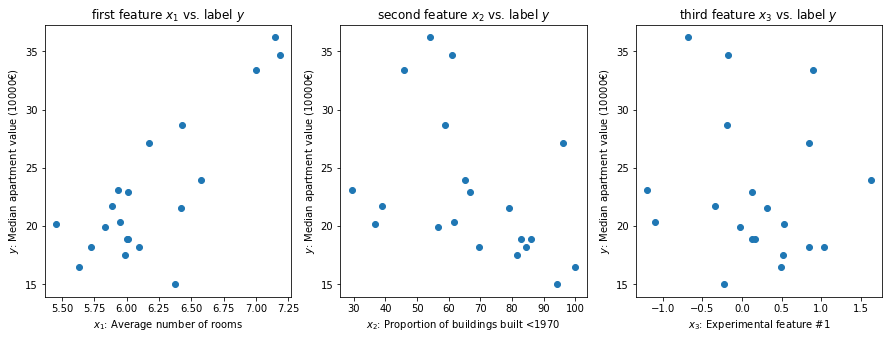

In [8]:
# Create a figure with 3 subplots in 1 row 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Create first subplot 
ax[0].scatter(X[:,0], y)
ax[0].set_title('first feature $x_{1}$ vs. label $y$')
ax[0].set_xlabel('$x_{1}$: Average number of rooms')
ax[0].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[1].scatter(X[:,1], y)
ax[1].set_xlabel('$x_{2}$: Proportion of buildings built <1970')
ax[1].set_title('second feature $x_{2}$ vs. label $y$')
ax[1].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[2].scatter(X[:,2], y)
ax[2].set_xlabel('$x_{3}$: Experimental feature #1')
ax[2].set_title('third feature $x_{3}$ vs. label $y$')
ax[2].set_ylabel('$y$: Median apartment value (10000€)')

# Display the figure containing two subplots 
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math

# Load housing data with two features
X, y = load_housing_data(n=2)

# Create the linear regression object
reg = LinearRegression(fit_intercept=True) 

# Fit the linear regression model  
reg.fit(X, y)

# Get the optimal weight vector w of the fitted model 
w_opt = reg.coef_

# Reshape the numpy array to have dimension (n,1) 
w_opt = w_opt.reshape(-1,1)

# Print the optimal weight vector 
display(Math(r'$\mathbf{w}_{\rm opt} ='))
print(w_opt)

<IPython.core.display.Math object>

[[ 9.97587284]
 [-0.10507286]]


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y = load_housing_data(n=11)

# Create a linear regression model
reg = LinearRegression(fit_intercept=True) 

# Train the model on the features X and label y
reg = reg.fit(X, y)

# Calculate the predicted labels of the data points in the training set
y_pred = reg.predict(X)

# Calculate the MSE of the true and predicted labels of the training set
training_error = mean_squared_error(y, y_pred)

# Print training error 
print("\nThe resulting mean squared error (training error) is ", training_error)


The resulting mean squared error (training error) is  4.2282944519846234e-29


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error             

max_r = 10

# Load the dataset using 10 features 
X, y = load_housing_data(n=10)

# Vector for storing the training error of for each r
linreg_error = np.zeros(max_r)   

for i in range(1,max_r+1):
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X[:,0:i],y)
    y_pred = reg.predict(X[:,0:i])
    linreg_error[i-1] = mean_squared_error(y, y_pred)

linreg_error

array([12.0474438 ,  7.69303722,  7.65579244,  7.29116713,  7.19561001,
        5.62766756,  5.5391522 ,  5.42878822,  5.38301569,  5.38299943])

Training errors (rounded to 2 decimals): 
 [12.05  7.69  7.66  7.29  7.2   5.63  5.54  5.43  5.38  5.38]


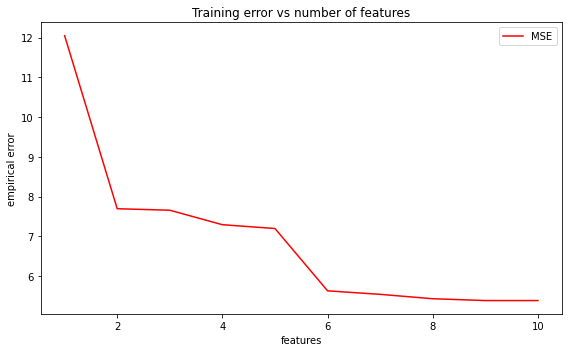

In [51]:
# Print the training errors
print(f"Training errors (rounded to 2 decimals): \n {np.round(linreg_error, 2)}")

# create a numpy array "r_values" containing the values 1,2...,max_r 
r_values = np.linspace(1, max_r, max_r, endpoint=True)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(1,1, figsize=(8, 5))
# add a curve representing the average squared error for each choice of r 
axes.plot(r_values, linreg_error, label='MSE', color='red')
# add captions for the horizontal and vertical axes 
axes.set_xlabel('features')
axes.set_ylabel('empirical error')
# add a title to the plot 
axes.set_title('Training error vs number of features')
axes.legend()
plt.tight_layout()
plt.show()

In [82]:
# maximum number of data points
max_m = 10     

# Load the dataset using n=2 features 
X, y = load_housing_data(n=2)   

# Array in which to store the training errors of the different number of data points
train_error = np.zeros(max_m)         

for i in range(1,max_m+1):
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X[:i],y[:i])
    y_pred = reg.predict(X[:i])
    train_error[i-1] = mean_squared_error(y[:i], y_pred)

train_error


array([0.00000000e+00, 0.00000000e+00, 1.68290326e-29, 2.12852367e-01,
       4.29426052e-01, 2.85923088e+00, 3.00434922e+00, 7.62658789e+00,
       6.87343000e+00, 6.72136404e+00])

Training Errors (Rounded to 2 decimals): 
 [0.   0.   0.   0.21 0.43 2.86 3.   7.63 6.87 6.72]


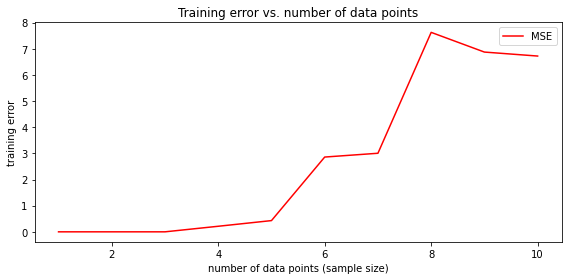

In [84]:
# Print training errors
print(f"Training Errors (Rounded to 2 decimals): \n {np.round(train_error, 2)}")

# create a numpy array "m_values" containing the values 1,2...,max_m
m_values = np.arange(1, max_m + 1)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# add a curve representing the average squared error for each choice of m
axes.plot(m_values, train_error, label='MSE', color='red')
# add captions for axes of the plot 
axes.set_xlabel('number of data points (sample size)')
axes.set_ylabel('training error')
# add title for the plot 
axes.set_title('Training error vs. number of data points')
axes.legend()
plt.tight_layout()
# display the plot 
plt.show()